In [112]:
import numpy as np

# Paimamos įvesties ir svorių reikšmės, sudauginama i-oji įvesties reikšmė su i-ojo svorio reikšme ir taip su visomis įvesties reikšmėmis, jos susumuojamos ir grąžinama reikšmė
# (arba galima panaudoti scaliarinią sandaugą)
def countA(inputValues: [float], weights: [float] ) -> float:
    return np.dot(inputValues, weights)

# Apskaičiuojama slenkstinės funkcijos reikšmė
def threshold(x) -> int:
    return 1 if x >= 0 else 0

# Apskaičiuojama sigmoidinės funkcijos reikšmė
def sigmoid(x) :
    return round(1 / (1 + np.exp(-x)))

# Paimamas įvesties duomenų masyvas, atskiriama įvesties reikšmė nuo išvesties reikšmės. Prie įvesties pridedama 1(poslinkio reikšmę norint traktuoti kaip svorį).
def separateInputOutputAndAddBias(inputValues: np.ndarray) -> (np.ndarray, [float]):
    output = inputValues[:, -1]
    removedOutput = np.delete(inputValues, -1, axis=1)
    inputValues = np.concatenate((np.array([1 for _ in range(removedOutput.shape[0])])[:, np.newaxis], removedOutput), axis=1)
    return inputValues, output

# Šioje funkcijoje kiekvienai įvesties reikšmei pritaikoma countA funkcija kartu su aktyvacijos funkcija ir tikrinama ar gauta reikšmė sutampa su išvesties reikšme.
def applyWeightstoAllInputs(inputValues: np.ndarray, output: [float], weights:[float], activationFunction: callable) -> bool:
    countMatches = 0
    for i in range(inputValues.shape[0]):
        if activationFunction(countA(inputValues[i], weights)) == output[i]:
            countMatches += 1

    return countMatches == inputValues.shape[0]

def readDataFromFile(filename: str, skipRows: int = 1) -> np.ndarray:
    return np.loadtxt(filename, delimiter=',',skiprows=skipRows)

# Sugeneruojami visi galimi svorių variantai intervale [-10, 10] su žingsniu 1
def generateWeigths() -> [float, float, float]:
    values = np.arange(-10, 10, 1)
    weights = []
    for i in values:
        for j in values:
            for k in values:
                weights.append([i, j, k])
    return weights

# Funkcija paima visus sugeneruotus svorių kombinacijas, pritaiko ivesties reikšmėms, patikrina ar applyWeightstoAllInputs grąžina True, jei taip, tai prideda svorių kombinaciją prie tinkamų svorių masyvo
def weightSearchFunction(input: np.ndarray, output: float, weights: [float, float, float], function: callable) -> [float, float, float]:
    validWeights = []
    for weight in weights:
        if applyWeightstoAllInputs(input, output, weight, function):
            validWeights.append(weight)
    return validWeights


inputData = readDataFromFile('input.csv')
input, output = separateInputOutputAndAddBias(inputData)
generateWeigths = generateWeigths()
print("Threshold")
weights = weightSearchFunction(inputData, output, generateWeigths, threshold)
print(weights)
print(len(weights))

print("Sigmoid")
weights = weightSearchFunction(inputData, output, generateWeigths, sigmoid)
print(weights)
print(len(weights))

Threshold
[[3, 1, -1], [3, 1, 0], [3, 1, 1], [3, 1, 2], [3, 1, 3], [3, 1, 4], [3, 1, 5], [3, 1, 6], [3, 1, 7], [3, 1, 8], [3, 1, 9], [6, 2, -3], [6, 2, -2], [6, 2, -1], [6, 2, 0], [6, 2, 1], [6, 2, 2], [6, 2, 3], [6, 2, 4], [6, 2, 5], [6, 2, 6], [6, 2, 7], [6, 2, 8], [6, 2, 9], [8, 3, -4], [8, 3, -3], [8, 3, -2], [8, 3, -1], [8, 3, 0], [8, 3, 1], [8, 3, 2], [8, 3, 3], [8, 3, 4], [8, 3, 5], [8, 3, 6], [8, 3, 7], [8, 3, 8], [8, 3, 9], [9, 3, -4], [9, 3, -3], [9, 3, -2], [9, 3, -1], [9, 3, 0], [9, 3, 1], [9, 3, 2], [9, 3, 3], [9, 3, 4], [9, 3, 5], [9, 3, 6], [9, 3, 7], [9, 3, 8], [9, 3, 9]]
52
Sigmoid
[[0, 0, 1], [0, 0, 2], [0, 0, 3], [0, 0, 4], [0, 0, 5], [0, 0, 6], [0, 0, 7], [0, 0, 8], [0, 0, 9], [3, 1, -1], [3, 1, 0], [3, 1, 1], [3, 1, 2], [3, 1, 3], [3, 1, 4], [3, 1, 5], [3, 1, 6], [3, 1, 7], [3, 1, 8], [3, 1, 9], [5, 2, -2], [5, 2, -1], [5, 2, 0], [5, 2, 1], [5, 2, 2], [5, 2, 3], [5, 2, 4], [5, 2, 5], [5, 2, 6], [5, 2, 7], [5, 2, 8], [5, 2, 9], [6, 2, -3], [6, 2, -2], [6, 2, -1], [6

In [118]:
import random

# Krūties vėžio duomenų aibės klasės pervadinamos į skaičius, kad būtų galima apdoroti M - 1, B - 0,
# po to duomenys sumaišomi, pirmas stulpelis(Id) išmetamas, klasės reiksmė iškeliama į atskirą masyvą,
# prie įvesties pridedama 1(poslinkio reikšmę norint traktuoti kaip svorį).
def prepareBreastCancerData(inputFile: str) -> (np.ndarray, [int]):
    outputFile= inputFile.replace('.data', '2.csv')
    with open(inputFile, 'r') as fileInput:
        with open(outputFile, 'w') as file:
            for row in fileInput:
                if "?" in row:
                    continue
                file.write(row)
    inputData = readDataFromFile(outputFile, 0)
    np.random.shuffle(inputData)
    inputData = np.delete(inputData, 0, axis=1)
    output = inputData[:, -1]
    output =  [0 if x == 4 else 1 for x in output]
    inputData = np.delete(inputData, -1, axis=1)
    inputData = np.concatenate((np.array([1 for _ in range(inputData.shape[0])])[:, np.newaxis], inputData), axis=1)
    print(inputData)
    print(output)
    return inputData, output

# Irisų duomenų aibėje išmetamos Iris-setosa klasės reikšmės, kad būtų galima apdoroti Iris-versicolor, Iris-virginica, kaip 0 ir 1,
# po to duomenys sumaišomi, paskutinis stulpelis(klasės reikšmė) perkeliama į atskirą masyva) ir išmetama.
def prepareIrisData(inputFile: str) -> (np.ndarray, [int]):
    outputFile= inputFile.replace('.data', '2.csv')
    with open(inputFile, 'r') as fileInput:
        with open(outputFile, 'w') as file:
            for row in fileInput:
                if 'Iris-setosa' in row:
                    continue
                modifiedString = row.replace('Iris-versicolor', '0').replace('Iris-virginica', '1')
                file.write(modifiedString)
    inputData = readDataFromFile(outputFile, 0)
    np.random.shuffle(inputData)
    output = inputData[:, -1]
    inputData = np.delete(inputData, -1, axis=1)
    inputData = np.concatenate((np.array([1 for _ in range(inputData.shape[0])])[:, np.newaxis], inputData), axis=1)
    return inputData, output

# Paimamos įvesties ir svorių reikšmės, sudauginama i-oji įvesties reikšmė su i-ojo svorio reikšme ir taip su visomis įvesties reikšmėmis, jos susumuojamos ir grąžinama reikšmė
# (arba galima panaudoti scaliarinią sandaugą)
def countA(inputValues: [float], weights: [float] ) -> float:
    return np.dot(inputValues, weights)

# Apskaičiuojama sigmoidinės funkcijos reikšmė
def sigmoid(x) -> float:
    return 1 / (1 + np.exp(-x))

# Sugeneruojami svoriai intervale [0, 1] su 2 skaičių po kablelio
def generateWeigths(count: int) -> [float]:
    return [ round(random.uniform(0, 1), 2) for _ in range(count)]

# Apmokomas neuromas su viena duomenų aibes įvestimi ir išvestimi epochu kartų skaičių naudojant paketišką gradientinį nusileidimą su sigmoidine aktyvacijos funkcija
def trainModel(weights: [float], input: np.ndarray, output: [float], learningRate: float, activationFunction: callable, epochs: int) -> [float]:
    numberOfelements = input.shape[0]
    for _ in range(epochs):
        gradientSum = [0 for _ in range(len(weights))]
        for i in range(input.shape[0]):
            for j in range(len(weights)):
                prediction = activationFunction(countA(input[i], weights))
                gradientSum[j] += (prediction - output[i] ) * prediction*(1-prediction)* input[i][j]
        for i in range (len(weights)):
            weights[i] = weights[i] - learningRate * gradientSum[i]/numberOfelements
        # print(weights)
        print(gradientSum)
    return weights#, totalError/numberOfelements

# Testuojamas apmokytas modelis su testiniais duomenimis, grąžinama tikslumo reikšmė ir paklaida
def testModel(weights: [float], input: np.ndarray, output: [float], activationFunction: callable) -> (float, float): # returns accuracy on test data
    countMatches = 0
    error = 0.0
    for i in range(input.shape[0]):
        predictedOutput = activationFunction(countA(input[i], weights))
        error += pow(predictedOutput - output[i], 2) # E(W) = \sum (t - y)^2
        if round(predictedOutput) == output[i]:
            countMatches += 1
    return countMatches / input.shape[0], error / input.shape[0]

# Apmokomas ir testuojamas modelis su duomenimis iš failo su slenkstine ir sigmoidine funkcijomis
def runTrainAndTest(fileName: str, prepareData: callable):
    learningPercentace = 0.7
    learningRate = 0.9
    epochs = 100
    input,output = prepareData(fileName)
    weights = generateWeigths(input.shape[1])
    splitPart = round(input.shape[0]*learningPercentace)
    trainInput = input[:splitPart]
    trainOutput = output[:splitPart]
    testInput = input[splitPart:]
    testOutput = output[splitPart:]

    weights = generateWeigths(input.shape[1])
    weights = trainModel(weights, trainInput, trainOutput, learningRate, sigmoid, epochs)
    accuracy, error = testModel(weights, testInput, testOutput, sigmoid)
    print("sigmoid")
    print("weights:", weights)
    print("accuracy:",accuracy)
    print("error:",error)

    # for i in range (testInput.shape[0]):
    #     print(i+1,"&",round(sigmoid(countA(testInput[i], weights))), "&", round(testOutput[i]), "\\\\")

runTrainAndTest("breast-cancer-wisconsin.data", prepareBreastCancerData)
# runTrainAndTest("iris.data", prepareIrisData)



[[1. 1. 1. ... 3. 1. 1.]
 [1. 3. 1. ... 2. 1. 1.]
 [1. 5. 1. ... 1. 1. 1.]
 ...
 [1. 4. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 4. 1. ... 3. 1. 1.]]
[1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 

iris
range 0
[0.1464124846612679, 0.8425394860475909, 0.38857988260069487, 0.596699903714846, 0.1853745840598289]
[0.16340099906359176, 0.9412606943028508, 0.4341798805691214, 0.666822647777829, 0.20716084081423086]
[0.1846997584036216, 1.0651663753297087, 0.4914233379785369, 0.7548531325649053, 0.23450908032635143]
[0.21212707956394217, 1.224924532068161, 0.565246332595938, 0.8683791092939257, 0.2697745365969339]
[0.24865337722735037, 1.4379860428107076, 0.6637260689988076, 1.0198110898430355, 0.3168079310557598]
[0.2994479096092996, 1.734766732851008, 0.80094675415266, 1.2307731555956152, 0.38231486878517923]
[0.3742629707380389, 2.172751731425417, 1.003543282239382, 1.5421079113898275, 0.4789488833060321]
[0.49355022547663935, 2.8727455775898427, 1.3275404100667532, 2.0395296381812553, 0.6332222707149432]
[0.7067208615330502, 4.127300926493893, 1.9088366439849638, 2.929964494661087, 0.9089279802601304]
[1.1572281698927216, 6.787403644867963, 3.1442714868530834, 4.809829897166514, 1.

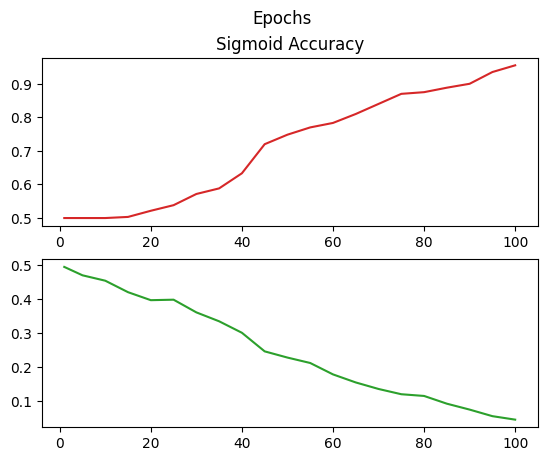

In [117]:

def runTrainAndTestEpochs(fileName: str, prepareData: callable):
    learningPercentace = 0.7
    learningRate = 0.9
    epochss= [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60,65,70,75,80,85,90,95,100]
    rangee = 20
    sigmoidAccuracies = []
    sigmoidErrors = []
    # run it for several runs and return the average accuracy and error


    input,output = prepareData(fileName)
    print(fileName.replace('.data', ''))
    for r in range(rangee):
        print("range",r)
        sigmoidAccuracy = []
        sigmoidError = []
        weightstemp = generateWeigths(input.shape[1])
        for epochs in epochss:
            # print(epochs, "epochs")
            weights = weightstemp
            splitPart = round(input.shape[0]*learningPercentace)
            trainInput = input[:splitPart]
            trainOutput = output[:splitPart]
            testInput = input[splitPart:]
            testOutput = output[splitPart:]
            weights = trainModel(weights, trainInput, trainOutput, learningRate, sigmoid, epochs)
            accuracy, error = testModel(weights, testInput, testOutput, sigmoid)
            sigmoidAccuracy.append((epochs,accuracy))
            sigmoidError.append((epochs,error))
            # print("sigmoid; accuracy:",accuracy,"error:",error)
        print("sigmoidAccuracy", sigmoidAccuracy)
        print("sigmoidError", sigmoidError)
        sigmoidAccuracies.append(sigmoidAccuracy)
        sigmoidErrors.append(sigmoidError)
    # get the average accuracy and error
    sigmoidAccuracy = []
    sigmoidError = []
    # print("epochcs", epochss)
    for i in epochss:
        # print(i)
        sigmoidAccuracyOne  = 0
        sigmoidErrorOne = 0
        for j in range(rangee):
            # get index of epoch
            index = [x[0] for x in sigmoidAccuracies[j]].index(i)
            # print("epoch:",i)
            # print("index",index)
            # print("range",j)
            sigmoidAccuracyOne += sigmoidAccuracies[j][index][1]
            sigmoidErrorOne += sigmoidErrors[j][index][1]
        sigmoidAccuracy.append((i, sigmoidAccuracyOne/rangee))
        sigmoidError.append((i, sigmoidErrorOne/rangee))

    print("SigmoidAccuracy", sigmoidAccuracy)
    print("SigmoidError", sigmoidError)
    return ( sigmoidAccuracy, sigmoidError)
   

(swa,swe) = runTrainAndTestEpochs("breast-cancer-wisconsin.data", prepareBreastCancerData)

# (sia,sie) = runTrainAndTestEpochs("iris.data", prepareIrisData)

 #plot graphs into one figure
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2)
fig.suptitle('Epochs')
axs[0].plot([x[0] for x in swa], [x[1] for x in swa], 'tab:green')
axs[0].set_title('Sigmoid Accuracy')
axs[1].plot([x[0] for x in swe], [x[1] for x in swe], 'tab:red')
# axs[0].plot([x[0] for x in sia], [x[1] for x in sia], 'tab:red')
axs[0].set_title('Sigmoid Accuracy')
# axs[1].plot([x[0] for x in sie], [x[1] for x in sie], 'tab:green')

def runTrainAndTestLearningRate(fileName: str, prepareData: callable):
    learningPercentace = 0.7
    epochs = 20
    learningRates= [0.1, 0.2, 0.3, 0.4, 0.5, 0.5, 0.6, 0.7, 0.8, 0.9]
    rangee = 20
    sigmoidAccuracies = []
    sigmoidErrors = []

    print(fileName.replace('.data', ''))
    for _ in range(rangee):
        sigmoidAccuracy = []
        sigmoidError = []
        input,output = prepareData(fileName)
        weightstemp = generateWeigths(input.shape[1])
        for rate in learningRates:
            # print("epochs:", epochs)
            weights = weightstemp
            splitPart = round(input.shape[0]*learningPercentace)
            trainInput = input[:splitPart]
            trainOutput = output[:splitPart]
            testInput = input[splitPart:]
            testOutput = output[splitPart:]

            weights = trainModel(weights, trainInput, trainOutput, rate, sigmoid, epochs)
            accuracy, error = testModel(weights, testInput, testOutput, sigmoid)
            sigmoidAccuracy.append((rate,accuracy))
            sigmoidError.append((rate,error))
        sigmoidAccuracies.append(sigmoidAccuracy)
        sigmoidErrors.append(sigmoidError)
    sigmoidAccuracy = []
    sigmoidError = []
    for i in learningRates:
        sigmoidAccuracyOne  = 0
        sigmoidErrorOne = 0
        for j in range(rangee):
            index = [x[0] for x in sigmoidAccuracies[j]].index(i)
            sigmoidAccuracyOne += sigmoidAccuracies[j][index][1]
            sigmoidErrorOne += sigmoidErrors[j][index][1]
        sigmoidAccuracy.append((i, sigmoidAccuracyOne/rangee, sigmoidErrorOne/rangee))

    print("SigmoidAccuracy", sigmoidAccuracy)
    for element in sigmoidAccuracy:
        print("&& $", element[0], "$ & $", round(element[1],4), "$ & $", round(element[2],4), "$ \\\\")


# runTrainAndTestLearningRate("breast-cancer-wisconsin.data", prepareBreastCancerData)
# runTrainAndTestLearningRate("iris.data", prepareIrisData)

